<a href="https://colab.research.google.com/github/AnastasiaMoiseyev/Probability_Statistics/blob/main/Final_Lab_Moiseyev_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


I replace the image dataset in google slides with my own data. I am attaching a link below.
https://docs.google.com/presentation/d/16NQGey4LAGMWjndFr29I1jwlUneoGA-SjcTaoaFFTnY/edit#slide=id.g1ab0328d4a1_0_18

https://docs.google.com/presentation/d/16NQGey4LAGMWjndFr29I1jwlUneoGA-SjcTaoaFFTnY/edit?usp=sharing

#The comment about:

pdf2image is a versatile tool that deserved to be in your graphics tool chest. Use it to convert PDF pages into high-fidelity images or to extract specific images from PDF documents.

#The comment about: 

What is Torch in Python?

PyTorch is an open source machine learning (ML) framework based on the Python programming language and the Torch library.

#The comment about: 

What does import Torch mean?

gives us access to some helpful neural network things, such as various neural network layer types (things like regular fully-connected layers, convolutional layers (for imagery), recurrent layers...etc).

In [2]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image #Install the pdf2iamge python module using the pip package manager.
!pip install flashtorch
#Implementation of  functions
import requests #import requests module
from pdf2image import convert_from_path #Import  all the necessary packages. #Convert all pdfs in a folder. #pdf_path -> Path to the PDF file. 
import matplotlib.pyplot as plt
import numpy as np #Import libraries
import torch
import requests #import requests module
from torchvision import * 
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [3]:
def GPU(data): # GPU ->Graphics Processing Unit #The Graphics Processing Unit (GPU) is one of the components of a computer’s video card, together with specialized memory and different Input/Output  units. 
              #def is used to create, (or define) a function #defining a function 
              #Now detailed explanation: 
              #Defining the function works as follows. 
              #Def is the keyword for defining a function. 
              #The function name is followed by parameter(s) in (). 
              #The colon : signals the start of the function body, which is marked by indentation. 
              #Inside the function body, the return statement determines the value to be returned.
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))
    #A torch.tensor is a multi-dimensional matrix containing elements of a single data type.
    #dtype – the desired data type of returned tensor. 
    #device -the device of the constructed tensor. 

def GPU_data(data): #GPU ->Graphics Processing Unit 
                    #def is used to create, (or define) a function 
                    #def -> defining a function 
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))
    #requires_grad – If autograd should record operations on the returned tensor. Default: False.


def plot(x): #def -> defining a function  #def is used to create, (or define) a function 
                  
    fig, ax = plt.subplots() #Plotting Routines: 1D Data #plt.subplots method provides a way to plot multiple plots on a single figure. Given the number of rows and columns , it returns a tuple ( fig , ax ), giving a single figure fig with an array of axes ax .
    im = ax.imshow(x, cmap = 'gray') #Colormapped or RGB arrays 
    #imshow() allows you to render an image to a rectangular region in data space. 
    ax.axis('off') #hide the axes
    fig.set_size_inches(5, 5) #fig.set_size_inches() that is used to set the figure size in inches.
    #That is, it means is a tuple of the width and height of the figure in inches
    plt.show() #Show the plot
    
def get_google_slide(url):  #def -> defining a function  #url -> Uniform Resource Locators #It specifies the type of server in which the file is located.
    url_head = "https://docs.google.com/presentation/d/" #url header
    url_body = url.split('/')[5] 
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id 

def get_slides(url): 
    url = get_google_slide(url) 
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}
 
model = alexnet(weights='DEFAULT').to(device)
model.eval();
#eval() allows to evaluation of arbitrary expressions from a string-based or compiled-code-based input. 
#This function can be handy when you're trying to dynamically evaluate expressions from any input that comes as a string or a compiled code object.

#model. eval() is a kind of switch for some specific layers/parts of the model that behave differently during training and inference (evaluating) time. 

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [6]:
url = "https://docs.google.com/presentation/d/16NQGey4LAGMWjndFr29I1jwlUneoGA-SjcTaoaFFTnY/edit#slide=id.g1ab0328d4a1_0_18" 
#This is my link to the presentation of my 50 photos. #I pasted my link here.
#url -> Uniform Resource Locators  #A URL( Uniform Resource Locator) is a web address to open a specific site. 

#We can see the displayed images, from my link (google slides). 

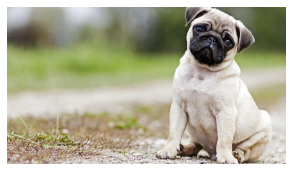

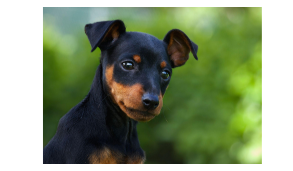

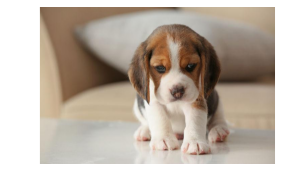

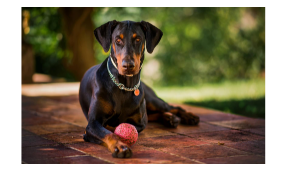

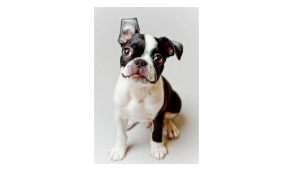

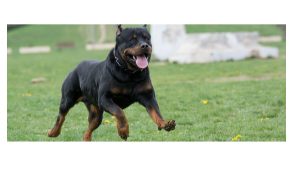

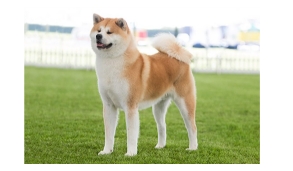

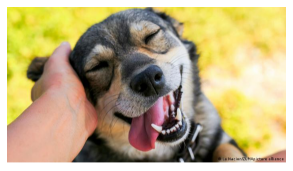

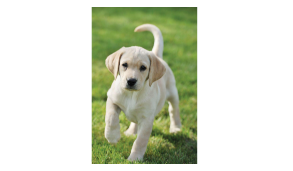

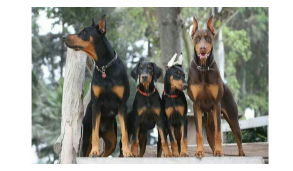

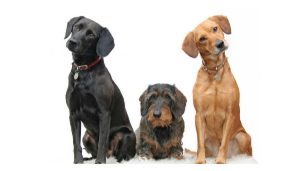

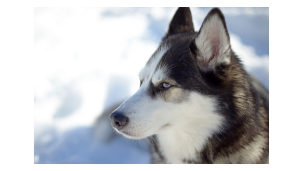

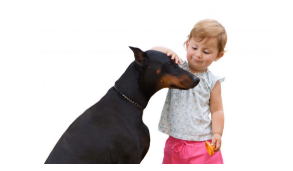

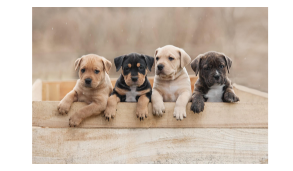

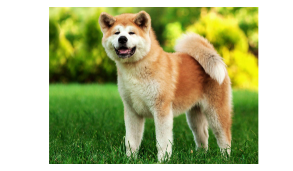

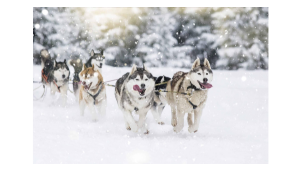

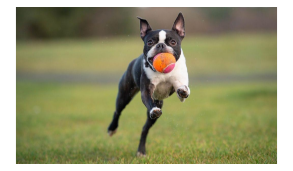

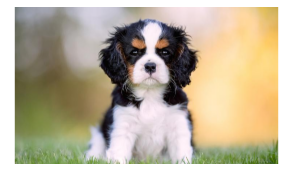

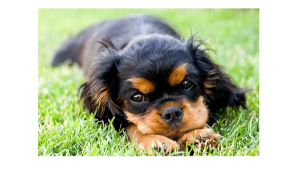

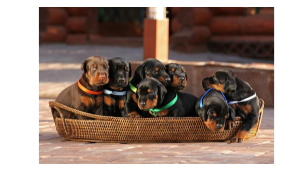

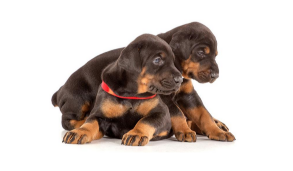

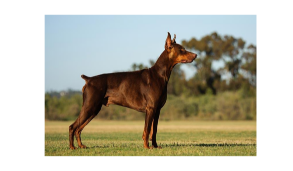

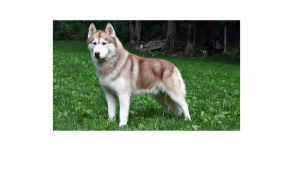

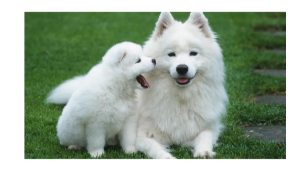

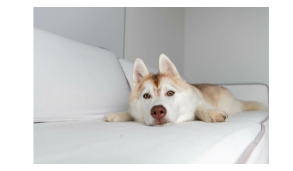

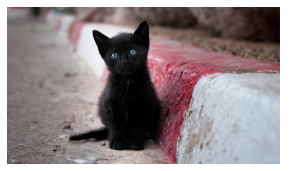

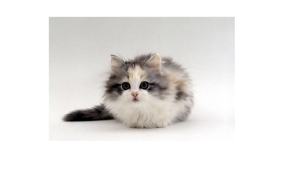

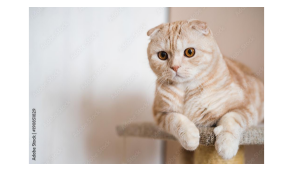

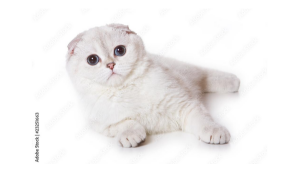

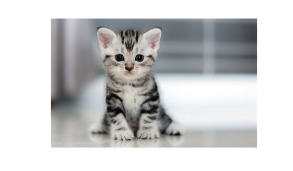

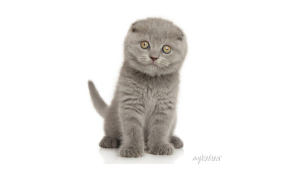

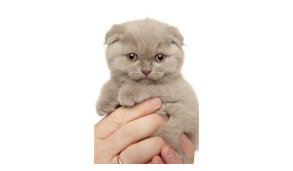

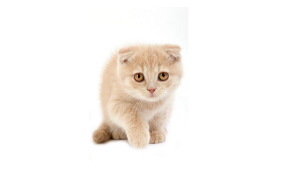

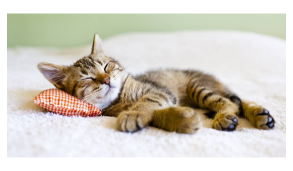

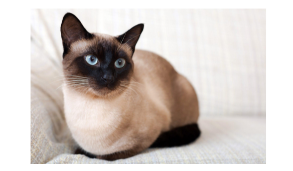

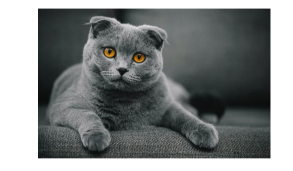

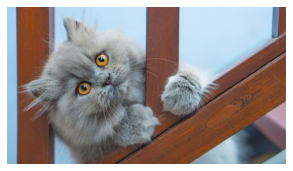

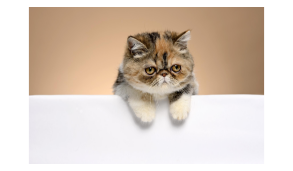

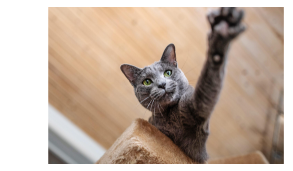

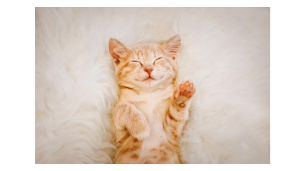

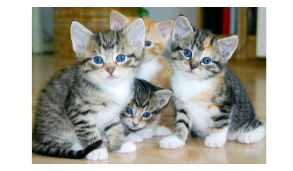

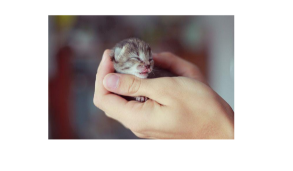

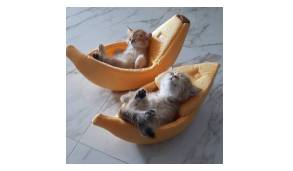

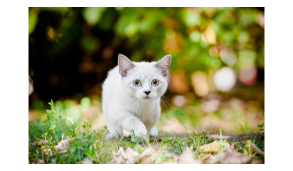

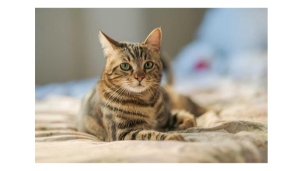

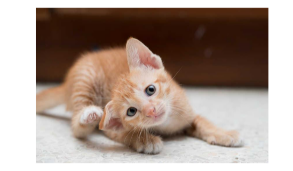

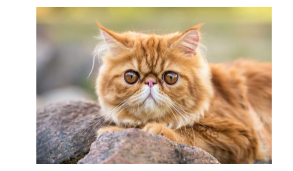

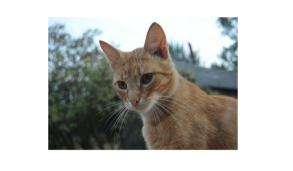

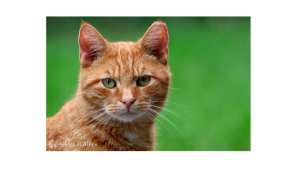

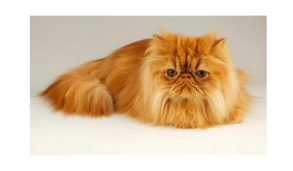

In [8]:
images = [] 

for image in get_slides(url): #url -> Uniform Resource Locators 

    plot(image) #Plot the image 

    images.append(load(image)) 
    #images.append: 
    #Appending is probably the simplest, of the multi-image operations provided to handle multiple images. 
    #Basically, it joins the current sequence of images in memory into a column, or a row, without gaps.
    
    #A load image is an object file that contains the load addresses and initialized sections of one executable file.
    #The load() method loads data from a server and puts the returned data into the selected element.


images = torch.vstack(images) #in sequence vertically 

In [10]:
images.shape
 #The dimensions of a given image like the height of the image, width of the image, and number of channels in the image are called the shape of the image. 
#In addition, the shape of an image is accessed by img.shape.

torch.Size([50, 3, 224, 224])

In [11]:
model(images)

tensor([[ -1.3532,  -7.9251,  -1.9020,  ...,  -2.7656,  -0.2788,   3.1470],
        [ -1.4709,  -0.4668,  -4.3356,  ...,  -2.9872,   5.8713,   2.4172],
        [ -5.8348,   0.5401,  -1.9185,  ...,  -3.5310,   0.7539,   7.7214],
        ...,
        [ -3.0620,   2.3489,  -0.8964,  ...,  -2.5874,   6.7158,   4.7403],
        [ -6.7719,  -0.8239,  -5.6898,  ...,   0.1408,   7.4816,   6.6695],
        [ -7.0637,   2.2464, -10.6650,  ...,  -8.6659,   3.6554,   4.6647]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

#Comment about tensor:
tensors (sequence of Tensors) – sequence of tensors to concatenate

In [12]:
y = model(images)

In [13]:
y.shape

torch.Size([50, 1000])

In [14]:
guesses = torch.argmax(y, 1).cpu().numpy()
#torch.argmax() method accepts a tensor and returns the indices of the maximum values of the input tensor across a specified dimension/axis. 
#If the input tensor exists with multiple maximal values then the function will return the index of the first maximal element.

In [27]:
for i in list(guesses):
    print(labels[i])

pug, pug-dog
miniature pinscher
beagle
Doberman, Doberman pinscher
Boston bull, Boston terrier
Rottweiler
Eskimo dog, husky
Tibetan mastiff
golden retriever
kelpie
Gordon setter
Eskimo dog, husky
Doberman, Doberman pinscher
tub, vat
dingo, warrigal, warragal, Canis dingo
dogsled, dog sled, dog sleigh
Border collie
papillon
Airedale, Airedale terrier
marimba, xylophone
black-and-tan coonhound
kelpie
Siberian husky
Samoyed, Samoyede
Chihuahua
schipperke
Persian cat
teddy, teddy bear
Persian cat
Egyptian cat
Egyptian cat
Persian cat
Persian cat
tabby, tabby cat
Siamese cat, Siamese
indri, indris, Indri indri, Indri brevicaudatus
Persian cat
tabby, tabby cat
lynx, catamount
Persian cat
tabby, tabby cat
weasel
Cardigan, Cardigan Welsh corgi
Arctic fox, white fox, Alopex lagopus
Egyptian cat
hamster
Persian cat
Egyptian cat
tiger cat
Persian cat


In [30]:
Y = np.zeros(50,) #Return a new array of given shape and type, filled with zeros. #numpy.zeros method
Y[25:] = 1

#The comment about: 
What does Y in Python mean?
It means that the function you have called returns an iterable, the index 0 of the iterable is assigned to x and the index 1 is assigned to y.

In [39]:
Y 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#The comment about: 
What does detach()Numpy() do?
detach() operation ---> This operation detaches the tensor from the current computational graph.

What does CPU () detach () do?
CPU () will do nothing at all if your Tensor is already on the CPU otherwise create a new Tensor on the CPU with the same content as x. Note that his op is differentiable and the gradient will flow back towards x! y = x. detach() breaks the graph between x and y.

In [40]:
X = y.detach().cpu().numpy() 

In [41]:
X.shape

(50, 1000)

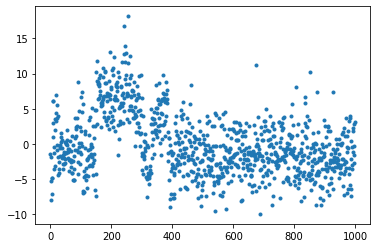

In [42]:
plt.plot(X[0],'.') #Plot the data
                   # '.' -> point        

In [43]:
X[0]

array([-1.35315728e+00, -7.92506266e+00, -1.90195501e+00, -5.21285200e+00,
       -4.77629280e+00, -4.81834364e+00, -7.13407707e+00,  6.13937569e+00,
        6.06312132e+00,  2.94190860e+00,  9.46791172e-01, -1.28138924e+00,
       -3.48395038e+00, -4.24212545e-01, -3.15262461e+00,  1.92257380e+00,
        3.48943329e+00,  7.01148224e+00,  3.28019738e+00,  4.42456722e+00,
       -7.91333973e-01,  3.64086199e+00, -1.86492682e-01,  5.53461552e+00,
        3.90436792e+00, -1.83286548e+00, -4.36036777e+00, -3.54683471e+00,
       -2.52716756e+00, -4.07414150e+00, -7.62887597e-02, -1.71952331e+00,
       -5.70892096e-01, -4.93453801e-01,  3.16050887e-01,  1.03403759e+00,
        1.58368087e+00, -1.91974235e+00, -5.84152877e-01,  6.27500355e-01,
       -3.60614657e+00, -2.81255794e+00, -1.58355188e+00, -2.89278126e+00,
       -1.45352197e+00, -1.20107698e+00, -2.05445838e+00, -2.09100056e+00,
        2.44190931e-01, -2.72149563e+00, -1.32643235e+00,  1.41492903e-01,
       -2.89090574e-02,  

In [44]:
np.argmax(X[0]) 
#working of argmax()
#np.argmax returns indices of the max element of the array in a particular axis. 

254

In [45]:
labels[948]

'Granny Smith'

In [46]:
top_ten = np.argsort(X[0])[::-1][0:10]
#np.argsort is used to perform an indirect sort along the given axis using the algorithm specified by the kind keyword. It returns an array of indices of the same shape as arr that would sort the array. #It means indices of value arranged in ascending order.

In [47]:
for i in top_ten:
    print(labels[i])

pug, pug-dog
bull mastiff
French bulldog
Boston bull, Boston terrier
Saint Bernard, St Bernard
boxer
Brabancon griffon
Labrador retriever
Pekinese, Pekingese, Peke
Great Dane


In [50]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

# Histogram
   A histogram is basically used to represent data provided in a form of some groups. It is an accurate method for the graphical representation of numerical data distribution. It is a type of bar plot where the X-axis represents the bin ranges while the Y-axis gives information about frequency.

#Histogram 
I was very interested to read about it. I am attaching a link below. 
 https://byjus.com/maths/histogram/

(array([ 33., 123., 263., 240., 168.,  92.,  54.,  21.,   4.,   2.]),
 array([-9.929583 , -7.1228237, -4.3160644, -1.5093054,  1.2974536,
         4.1042128,  6.9109716,  9.7177305, 12.52449  , 15.331249 ,
        18.138008 ], dtype=float32),
 <a list of 10 Patch objects>)

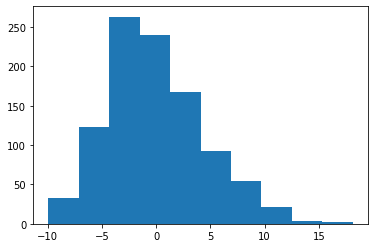

In [52]:
plt.hist(X[0]) #Getting histogram of image 
               #hist() -> a histogram.#Create histogram. 
               #It is is used to plot a histogram. 
               #The hist() function will use an array of numbers to create a histogram, the array is sent into the function as an argument.


In [53]:
X = GPU_data(X)
Y = GPU_data(Y)

#Softmax
Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector.

The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution.

In [54]:
def softmax(x):  #def -> defining a function  #def is used to create, (or define) a function 
    s1 = torch.exp(x - torch.max(x,1)[0][:,None]) #torch.exp method returns a new tensor after getting the exponent of the elements of the input tensor.
    s = s1 / s1.sum(1)[:,None]
    return s

#Cross_entropy
The cross-entropy loss function is an optimization function that is used for training classification models which classify the data by predicting the probability (value between 0 and 1) of whether the data belong to one class or another.

In [55]:
def cross_entropy(outputs, labels):             
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [56]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [57]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [58]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [59]:
X.shape

torch.Size([50, 1000])

In [60]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [61]:
def model(x,w):

    return x@w[0]

In [77]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


https://tensorspace.org/